<a href="https://colab.research.google.com/github/ajinkyajumde/Global-Terrorism-Analysis/blob/main/Copy_of_Untitled1_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install squarify


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 16.1 MB/s 
     |████████████████████████████████| 16.7 MB 301 kB/s 
     |████████████████████████████████| 6.3 MB 57.9 MB/s 


In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Almabetter projects/Global Terrorism Analysis/Global Terrorism Data.csv'
gt=pd.read_csv(path,encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
gt.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
gt.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [ ]:
gt.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
country=gt.groupby('country_txt')['iyear'].count().reset_index(name='Number of events')
c=country.sort_values(by='Number of events',ascending=False).head(10)

## **Here we have the top 10 countries in terms of number of terrorist activities.**


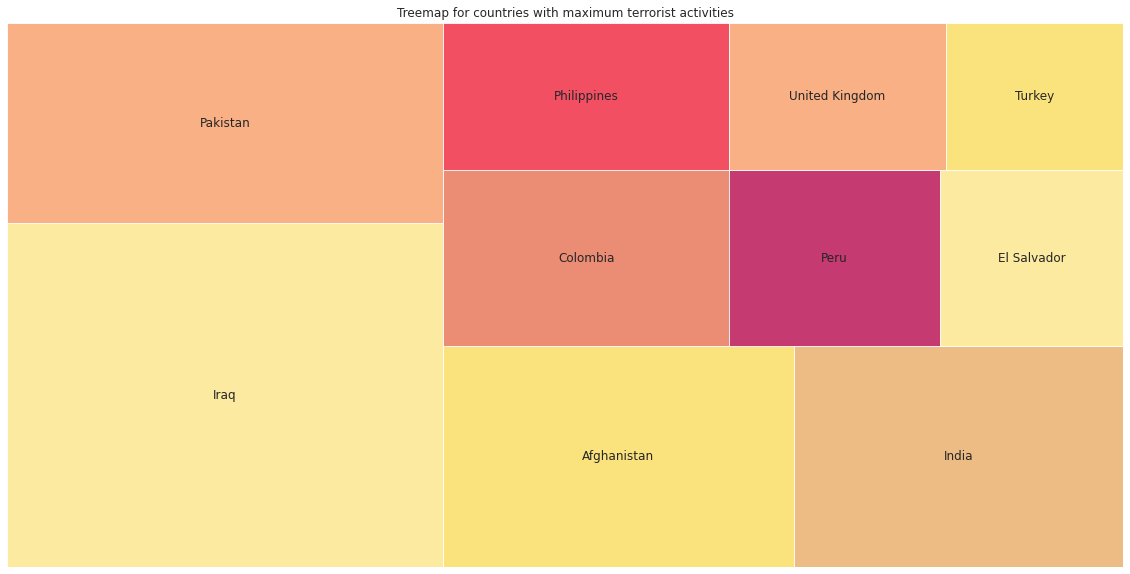

In [ ]:
import squarify
plt.figure(figsize=(20,10))
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= c['Number of events'].values# proportions of the categories
label=c['country_txt']
squarify.plot(sizes=sizes, label=label, alpha=0.8,color=colors).set(title='Treemap for countries with maximum terrorist activities')
plt.axis('off')
plt.show()

In [ ]:
att=gt.groupby('attacktype1_txt')['iyear'].count().reset_index(name='Number of events')
att.rename(columns = {'attacktype1_txt' : 'Attack type'},inplace=True)
att.sort_values(by='Number of events',ascending=False).head(10)

,Attack type,Number of events
2,Bombing/Explosion,88255
0,Armed Assault,42669
1,Assassination,19312
6,Hostage Taking (Kidnapping),11158
3,Facility/Infrastructure Attack,10356
8,Unknown,7276
7,Unarmed Assault,1015
5,Hostage Taking (Barricade Incident),991
4,Hijacking,659


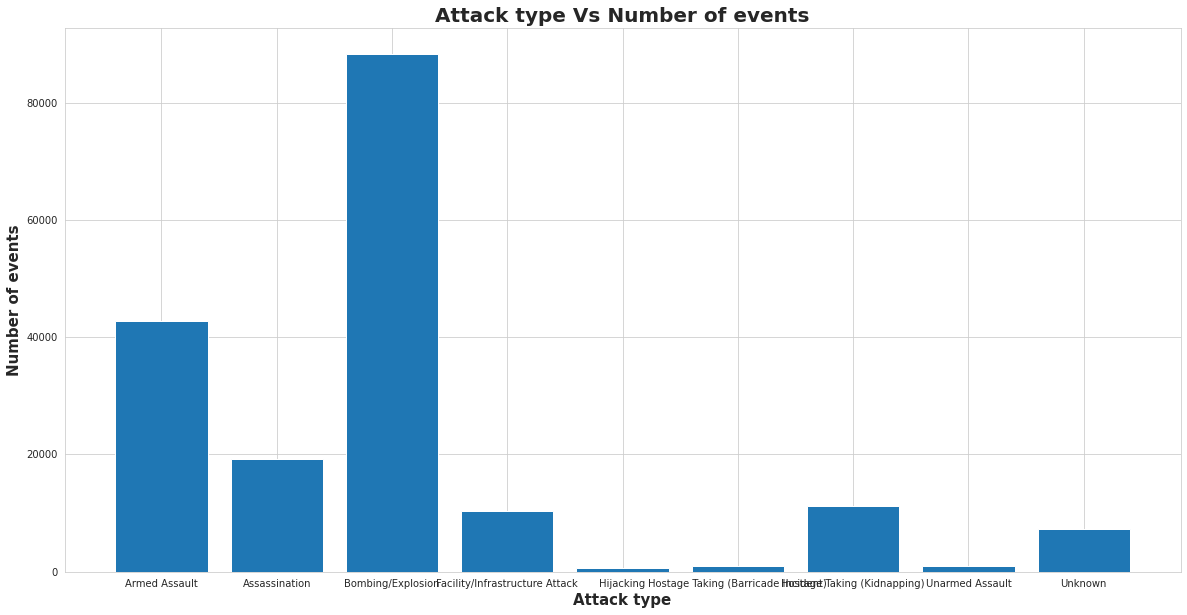

In [ ]:
# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
plt.bar(att['Attack type'], att['Number of events'])
plt.title('Attack type Vs Number of events',fontweight ='bold', fontsize = 20)
plt.xlabel('Attack type', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of events', fontweight ='bold', fontsize = 15)
 
# Show Plot
plt.show()

In [ ]:
r=gt.groupby('region_txt')['iyear'].count().reset_index(name='Number of events')
r.sort_values(by='Number of events',ascending=False)

,region_txt,Number of events
5,Middle East & North Africa,50474
8,South Asia,44974
7,South America,18978
10,Sub-Saharan Africa,17550
11,Western Europe,16639
9,Southeast Asia,12485
1,Central America & Caribbean,10344
4,Eastern Europe,5144
6,North America,3456
3,East Asia,802


In [ ]:
b=gt.groupby(['region_txt','attacktype1_txt'])['iyear'].count().unstack()


attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,51,36,75,71,3,6,13,11,16
Central America & Caribbean,4361,1254,3239,403,26,187,501,19,354
Central Asia,116,115,235,20,8,2,45,5,17


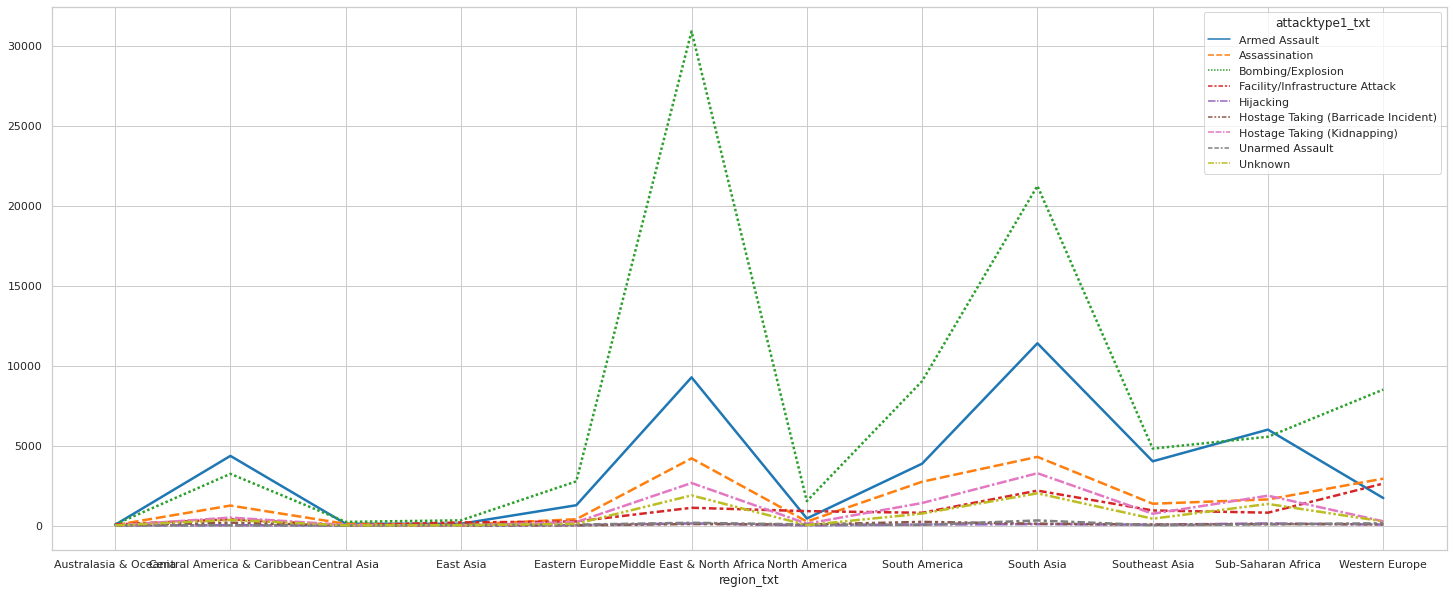

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25,10))
sns.lineplot(data=b, palette="tab10", linewidth=2.5)

In [ ]:
gt['year_range']=gt.apply((lambda x: '1970-1980' if x['iyear']<=1980 else '1981-1990' if x['iyear']>1980 and x['iyear']<1991 else '1991-2000' if x['iyear']>1990 and x['iyear']<2001 else'2001-2010' if x['iyear']>2000 and x['iyear']<2011 else '2011-2022'),axis=1)

In [ ]:
heat=gt.groupby(['year_range','attacktype1_txt'])['iyear'].count().unstack()
heat

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
year_range,,,,,,,,,
1970-1980,1998,2617,5317,1265,75,221,676,27,380
1981-1990,8005,5424,14871,1583,106,298,1146,49,903
1991-2000,6742,4427,10072,1946,171,112,1432,356,1431
2001-2010,6945,1704,15044,1516,88,43,1950,173,589
2011-2022,18979,5140,42951,4046,219,317,5954,410,3973


In [ ]:
typ=gt.groupby('targtype1_txt')['iyear'].count().reset_index(name='Number of events')
maxt=typ.sort_values(by='Number of events',ascending=False).head(3)
mint=typ.sort_values(by='Number of events',ascending=True).head(3)

In [ ]:
typ.sort_values(by='Number of events',ascending=False)

,targtype1_txt,Number of events
13,Private Citizens & Property,43511
9,Military,27984
12,Police,24506
6,Government (General),21283
2,Business,20669
18,Transportation,6799
20,Utilities,6023
19,Unknown,5898
14,Religious Figures/Institutions,4440
3,Educational Institution,4322


In [ ]:
maxt

,targtype1_txt,Number of events
13,Private Citizens & Property,43511
9,Military,27984
12,Police,24506


In [ ]:
mint

,targtype1_txt,Number of events
11,Other,137
0,Abortion Related,263
4,Food or Water Supply,317


In [ ]:
targ=gt.groupby(['targtype1_txt','attacktype1_txt'])['iyear'].count().unstack()

In [ ]:
targ

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
targtype1_txt,,,,,,,,,
Abortion Related,8.0,9.0,51.0,191.0,NaN,1.0,1.0,2.0,NaN
Airports & Aircraft,104.0,16.0,786.0,95.0,264.0,14.0,18.0,6.0,40.0
Business,2389.0,958.0,12020.0,2989.0,68.0,205.0,1543.0,70.0,427.0
Educational Institution,601.0,360.0,2232.0,602.0,9.0,35.0,348.0,72.0,63.0
Food or Water Supply,42.0,NaN,212.0,38.0,5.0,2.0,7.0,6.0,5.0
Government (Diplomatic),641.0,399.0,1666.0,293.0,27.0,58.0,321.0,34.0,134.0
Government (General),3451.0,5982.0,8214.0,1389.0,20.0,75.0,1604.0,121.0,427.0
Journalists & Media,381.0,749.0,754.0,206.0,3.0,236.0,481.0,49.0,89.0
Maritime,77.0,11.0,134.0,11.0,55.0,3.0,45.0,NaN,15.0


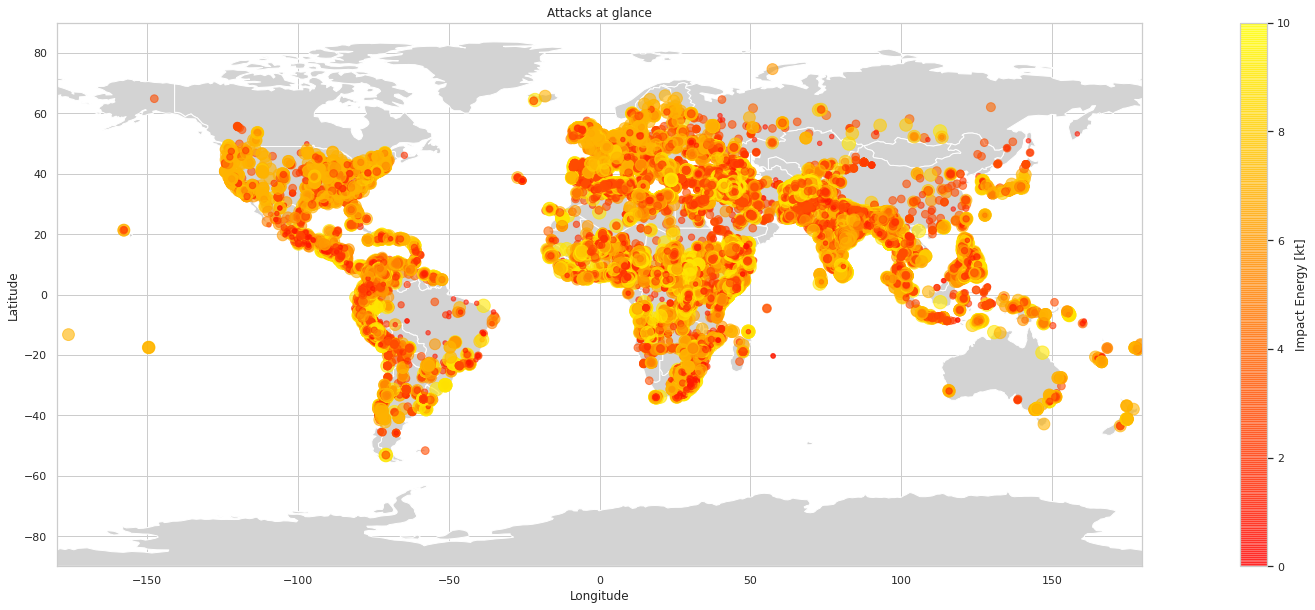

In [ ]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(35, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = gt['longitude']
y = gt['latitude']
z = gt['attacktype1']
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=10,
            cmap='autumn')
plt.colorbar(label='Impact Energy [kt]')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])


plt.title('Attacks at glance')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()